In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [7]:
cities

['teya',
 'georgetown',
 'harper',
 'kavieng',
 'vaini',
 'baglung',
 'albany',
 'punta arenas',
 'la mira',
 'lompoc',
 'clyde river',
 'atuona',
 'alta floresta',
 'nanortalik',
 'okhotsk',
 'saint george',
 'castro',
 'ketchikan',
 'cape town',
 'bhag',
 'verkhnyaya inta',
 'hobart',
 'kapaa',
 'amderma',
 'namatanai',
 'champerico',
 'gohpur',
 'mataura',
 'longyearbyen',
 'hermanus',
 'belushya guba',
 'bereda',
 'vardo',
 'hovd',
 'bambous virieux',
 'barth',
 'calabozo',
 'tiznit',
 'sindang',
 'zabol',
 'dwarka',
 'busselton',
 'minas',
 'torbay',
 'ndele',
 'khatanga',
 'pisco',
 'pascagoula',
 'mamallapuram',
 'kaitangata',
 'ushuaia',
 'cherskiy',
 'sentyabrskiy',
 'dali',
 'katsuura',
 'barentsburg',
 'carnarvon',
 'xiantao',
 'esperance',
 'aykhal',
 'rikitea',
 'matamoros',
 'qaanaaq',
 'illoqqortoormiut',
 'povenets',
 'jiaozuo',
 'ostrovnoy',
 'katsuyama',
 'vanavara',
 'codajas',
 'san patricio',
 'chuy',
 'bengkulu',
 'konotop',
 'igarka',
 'karema',
 'hualmay',
 'mar

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 38 of Set 25 | teya
Processing Record 39 of Set 25 | georgetown
Processing Record 40 of Set 25 | harper
Processing Record 41 of Set 25 | kavieng
Processing Record 42 of Set 25 | vaini
Processing Record 43 of Set 25 | baglung
Processing Record 44 of Set 25 | albany
Processing Record 45 of Set 25 | punta arenas
Processing Record 46 of Set 25 | la mira
Processing Record 47 of Set 25 | lompoc
Processing Record 48 of Set 25 | clyde river
Processing Record 49 of Set 25 | atuona
Processing Record 50 of Set 25 | alta floresta
Processing Record 51 of Set 25 | nanortalik
Processing Record 52 of Set 25 | okhotsk
Processing Record 53 of Set 25 | saint george
Processing Record 54 of Set 25 | castro
Processing Record 55 of Set 25 | ketchikan
Processing Record 56 of Set 25 | cape town
Processing Record 57 of Set 25 | bhag
Processing Record 58 of Set 25 | verkhnyaya inta
Processing Record 59 of Set 25 | hobart
Processing Record 60 of Set 25 | kapaa
Processing Record 61 of Set 25 | am

Processing Record 36 of Set 28 | bethel
Processing Record 37 of Set 28 | paamiut
Processing Record 38 of Set 28 | svetlogorsk
Processing Record 39 of Set 28 | chitungwiza
Processing Record 40 of Set 28 | merauke
Processing Record 41 of Set 28 | cascais
Processing Record 42 of Set 28 | amapa
Processing Record 43 of Set 28 | kita
Processing Record 44 of Set 28 | cabedelo
Processing Record 45 of Set 28 | marzuq
Processing Record 46 of Set 28 | eydhafushi
Processing Record 47 of Set 28 | qaqortoq
Processing Record 48 of Set 28 | saint anthony
Processing Record 49 of Set 28 | genappe
Processing Record 50 of Set 28 | raga
Processing Record 1 of Set 29 | ribeira grande
Processing Record 2 of Set 29 | meulaboh
Processing Record 3 of Set 29 | kargapolye
City not found. Skipping...
Processing Record 4 of Set 29 | sumbawa
City not found. Skipping...
Processing Record 5 of Set 29 | quatre cocos
Processing Record 6 of Set 29 | marystown
Processing Record 7 of Set 29 | chokurdakh
Processing Record 8

Processing Record 19 of Set 32 | karratha
Processing Record 20 of Set 32 | mayo
Processing Record 21 of Set 32 | bintulu
Processing Record 22 of Set 32 | vila franca do campo
Processing Record 23 of Set 32 | vostok
Processing Record 24 of Set 32 | glens falls
Processing Record 25 of Set 32 | senmonorom
City not found. Skipping...
Processing Record 26 of Set 32 | providencia
Processing Record 27 of Set 32 | progreso
Processing Record 28 of Set 32 | kuching
Processing Record 29 of Set 32 | stephenville
Processing Record 30 of Set 32 | aasiaat
Processing Record 31 of Set 32 | jiangyou
Processing Record 32 of Set 32 | hachinohe
Processing Record 33 of Set 32 | hofn
Processing Record 34 of Set 32 | iqaluit
Processing Record 35 of Set 32 | vinh
Processing Record 36 of Set 32 | vila velha
Processing Record 37 of Set 32 | mnogovershinnyy
Processing Record 38 of Set 32 | sinkat
City not found. Skipping...
Processing Record 39 of Set 32 | egvekinot
Processing Record 40 of Set 32 | berlevag
Proce

Processing Record 4 of Set 36 | itoman
Processing Record 5 of Set 36 | gulabpura
Processing Record 6 of Set 36 | labutta
City not found. Skipping...
Processing Record 7 of Set 36 | aflu
City not found. Skipping...
Processing Record 8 of Set 36 | lianran
Processing Record 9 of Set 36 | liverpool
Processing Record 10 of Set 36 | aripuana
Processing Record 11 of Set 36 | bela vista
Processing Record 12 of Set 36 | berezovka
Processing Record 13 of Set 36 | khani
Processing Record 14 of Set 36 | nantucket
Processing Record 15 of Set 36 | payo
Processing Record 16 of Set 36 | novo aripuana
Processing Record 17 of Set 36 | salalah
Processing Record 18 of Set 36 | gazli
Processing Record 19 of Set 36 | khanpur
Processing Record 20 of Set 36 | kerema
Processing Record 21 of Set 36 | orbetello
Processing Record 22 of Set 36 | sao sebastiao
Processing Record 23 of Set 36 | lichuan
Processing Record 24 of Set 36 | colares
Processing Record 25 of Set 36 | bria
Processing Record 26 of Set 36 | call

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teya,60.38,92.63,5.41,92,62,2.71,RU,2020-11-23 23:23:05
1,Georgetown,5.41,100.34,77.00,88,20,2.24,MY,2020-11-23 23:23:05
2,Harper,4.38,-7.72,78.12,87,26,7.43,LR,2020-11-23 23:23:06
3,Kavieng,-2.57,150.80,84.74,76,100,9.82,PG,2020-11-23 23:23:06
4,Vaini,-21.20,-175.20,80.60,74,75,6.93,TO,2020-11-23 23:23:06
5,Baglung,28.27,83.59,50.90,51,0,4.54,NP,2020-11-23 23:23:06
6,Albany,42.60,-73.97,37.99,69,5,1.99,US,2020-11-23 23:23:06
7,Punta Arenas,-53.15,-70.92,46.40,61,40,17.22,CL,2020-11-23 23:23:07
8,La Mira,18.04,-102.33,82.47,73,3,7.07,MX,2020-11-23 23:23:07
9,Lompoc,34.64,-120.46,59.00,72,20,12.75,US,2020-11-23 23:23:07


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

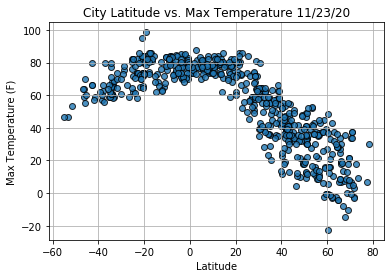

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

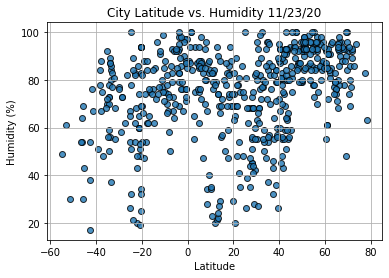

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

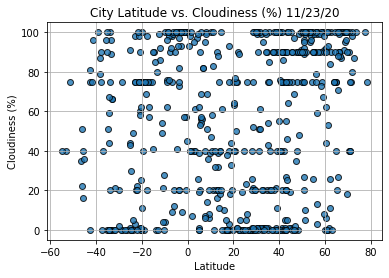

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

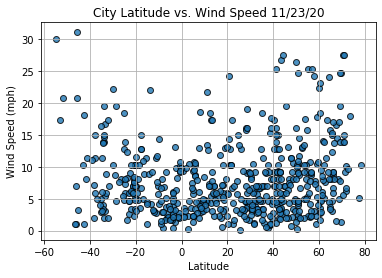

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

In [25]:
index13

City                   Nanortalik
Lat                         60.14
Lng                        -45.24
Max Temp                    26.76
Humidity                       85
Cloudiness                      0
Wind Speed                  22.26
Country                        GL
Date          2020-11-23 23:23:08
Name: 13, dtype: object

In [26]:
city_data_df.loc[city_data_df["Lat"] >= 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teya,60.38,92.63,5.41,92,62,2.71,RU,2020-11-23 23:23:05
1,Georgetown,5.41,100.34,77.00,88,20,2.24,MY,2020-11-23 23:23:05
2,Harper,4.38,-7.72,78.12,87,26,7.43,LR,2020-11-23 23:23:06
5,Baglung,28.27,83.59,50.90,51,0,4.54,NP,2020-11-23 23:23:06
6,Albany,42.60,-73.97,37.99,69,5,1.99,US,2020-11-23 23:23:06
...,...,...,...,...,...,...,...,...,...
566,Naifaru,5.44,73.37,81.66,76,53,9.53,MV,2020-11-23 23:24:56
567,Birecik,37.03,37.99,33.80,86,0,0.56,TR,2020-11-23 23:24:57
568,Kourou,5.16,-52.65,77.00,94,0,2.24,GF,2020-11-23 23:23:45
570,Dongkan,34.00,119.83,41.70,79,100,4.88,CN,2020-11-23 23:24:57


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teya,60.38,92.63,5.41,92,62,2.71,RU,2020-11-23 23:23:05
1,Georgetown,5.41,100.34,77.00,88,20,2.24,MY,2020-11-23 23:23:05
2,Harper,4.38,-7.72,78.12,87,26,7.43,LR,2020-11-23 23:23:06
5,Baglung,28.27,83.59,50.90,51,0,4.54,NP,2020-11-23 23:23:06
6,Albany,42.60,-73.97,37.99,69,5,1.99,US,2020-11-23 23:23:06


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

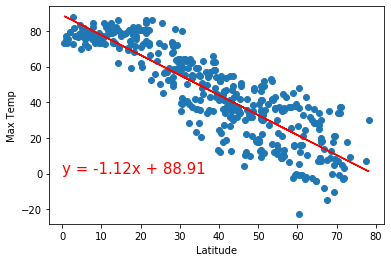

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,0))

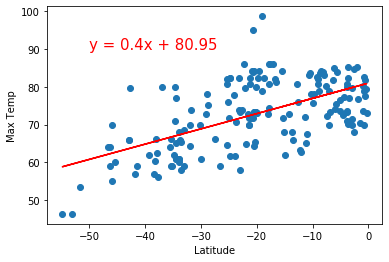

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

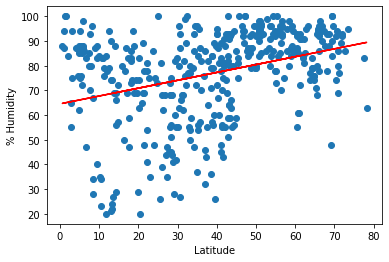

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

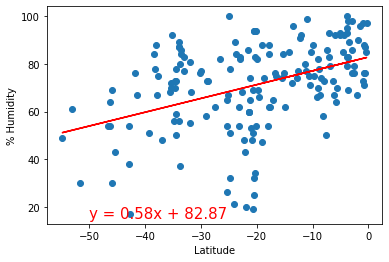

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

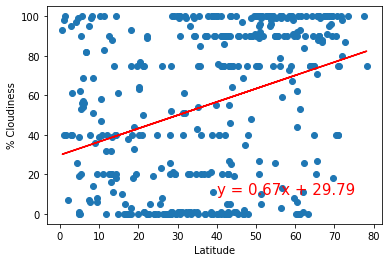

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

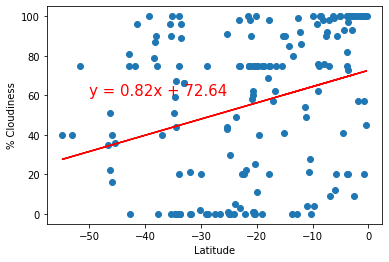

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

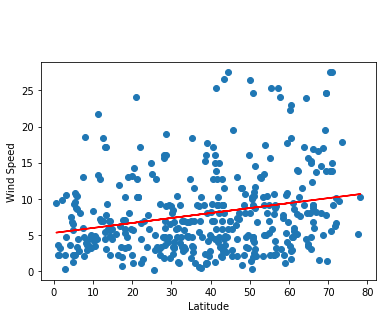

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))